# Exercícios 9.4 do Boyd e 5.7, 5.8, 5.17 e 5.20 do Antoniou

<div style="text-align: right"> 
2018/3  <br/>
Aluno: Pedro Bandeira de Mello Martins  <br/>
Disciplina: CPE773 - Otimização Convexa  <br/>
Professor: Wallace A. Martins  <br/>
PEE/COPPE - UFRJ  </div>

In [1]:
import sys
if '../..' not in sys.path:
    sys.path.append('../..')
    
import time
from scipy import optimize

from functions import functionObj, functionObj_multiDim
from functions import exercise57, exercise520, exercise520_gauss
from models.optimizers import InexactLineSearch,\
                              BacktrackingLineSearch,\
                              SteepestDescentAlgorithm,\
                              BasicNewtonAlgorithm,\
                              GaussNewtonMethod
from run_exercises import run_exercise, run_exercise520

## Exercício 9.4 do Boyd

## Exercício 5.7 do Antoniou

minimize $f(x) = (x_1^2+x_2^2-1)^2 + (x_1+x_2-1)^2$

by applying Algorithm 5.1. Use $\epsilon=10^{-6}$ and try the following initial points:
1. $[4~4]^T$
2. $[4~-4]^T$
3. $[-4~4]^T$
4. $[-4~-4]^T$

In [2]:
results_57_ILS = run_exercise(func=exercise57, opt=SteepestDescentAlgorithm, line_search=InexactLineSearch)

<Figure size 640x480 with 1 Axes>

In [3]:
results_57_ILS[['best_f', 'best_x0','best_x1', 'fevals', 'run_time (s)']]

,best_f,best_x0,best_x1,fevals,run_time (s)
[4 4]T,0.112301,0.614701,0.614701,34,0.037567
[4 -4]T,0.887089,0.714507,-0.654364,55,0.051969
[-4 4]T,0.887089,-0.654364,0.714507,55,0.057142
[-4 -4]T,0.887089,-0.654364,0.714507,55,0.051370


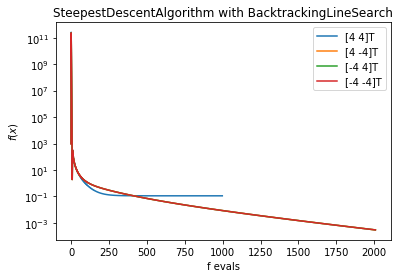

In [4]:
results_57_BLS = run_exercise(func=exercise57, opt=SteepestDescentAlgorithm, line_search=BacktrackingLineSearch)

In [ ]:
results_57_BLS[['best_f', 'best_x0','best_x1', 'fevals', 'run_time (s)']]

,best_f,best_x0,best_x1,fevals,run_time (s)
[4 4]T,0.110118,0.629998,0.629998,999,0.585600
[4 -4]T,0.000289525,1.004230,-0.018775,2009,1.049260
[-4 4]T,0.000289525,-0.018775,1.004230,2009,1.045178
[-4 -4]T,0.000289525,-0.018775,1.004230,2009,1.047830


## Exercício 5.8 do Antoniou

Minimizar a função do exercício 5.7 utilizando o algoritmo 5.2

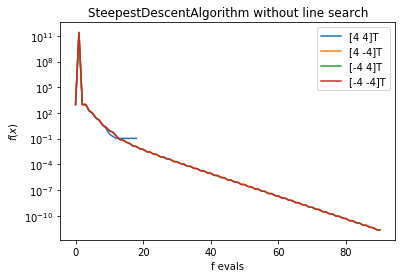

In [ ]:
results_58 = run_exercise(func=exercise57, opt=SteepestDescentAlgorithm, line_search=None)

In [ ]:
results_58[['best_f', 'best_x0','best_x1', 'fevals', 'run_time (s)']]

,best_f,best_x0,best_x1,fevals,run_time (s)
[4 4]T,0.110118,0.629961,0.629961,19,0.023927
[4 -4]T,2.32583e-12,1.000001,-0.000001,91,0.049242
[-4 4]T,2.32583e-12,-0.000001,1.000001,91,0.048989
[-4 -4]T,2.32583e-12,-0.000001,1.000001,91,0.050650


## Exercício 5.17 do Antoniou

Minimizar a função do exercício 5.7 utilizando a versão modificada do método de Newton do problema 5.15.

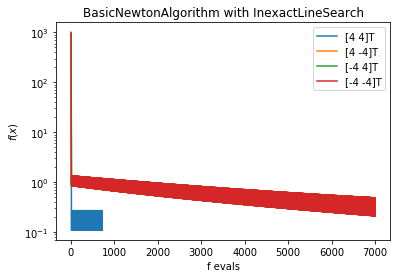

In [ ]:
results_517_ILS = run_exercise(func=exercise57, opt=BasicNewtonAlgorithm, line_search=InexactLineSearch)

In [ ]:
results_517_ILS[['best_f', 'best_x0','best_x1', 'fevals', 'run_time (s)']]

,best_f,best_x0,best_x1,fevals,run_time (s)
[4 4]T,0.110118,0.629960,0.629960,722,1.317274
[4 -4]T,0.211326,0.921996,-0.381678,7008,12.849016
[-4 4]T,0.211326,-0.381678,0.921996,7008,12.540036
[-4 -4]T,0.211326,-0.381678,0.921996,7008,12.673261


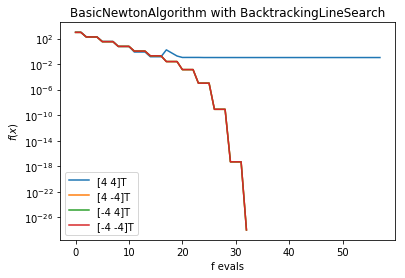

In [ ]:
results_517_BLS = run_exercise(func=exercise57, opt=BasicNewtonAlgorithm, line_search=BacktrackingLineSearch)

In [ ]:
results_517_BLS[['best_f', 'best_x0','best_x1', 'fevals', 'run_time (s)']]

,best_f,best_x0,best_x1,fevals,run_time (s)
[4 4]T,0.110118,6.299609e-01,6.299609e-01,58,0.096867
[4 -4]T,1.09257e-28,1.000000e+00,7.311143e-15,33,0.056534
[-4 4]T,1.09257e-28,7.326308e-15,1.000000e+00,33,0.055967
[-4 -4]T,1.09257e-28,7.326308e-15,1.000000e+00,33,0.056049


## Exercício 5.20 do Antoniou
minimize $f(x) = (x_1 + 10x_2)^2 + 5(x_3-x_4)^2 + (x_2-2x_3)^4 + 100(x_1-x_4)^4$

### item a)

In [ ]:
f_x = functionObj(exercise520)
start_time = time.process_time()
min_brute = optimize.brute(f_x, ((0, 200), (0, 200), (0, 200), (0, 200)), full_output=True)
brute_time = time.process_time() - start_time

In [ ]:
print('Minimum X found with brute force: [%.6f %.6f %.6f %.6f]'%(f_x.best_x[0], f_x.best_x[1], f_x.best_x[2], f_x.best_x[3]))
print('Minimum found with brute force: %.9f'%min_brute[0][0])
print('Time to find it with brute force: %.9f s'%brute_time)
print('Function evals with brute force: %d'%f_x.fevals)

Minimum X found with brute force: [0.000000 0.000000 0.000000 0.000000]
Minimum found with brute force: 0.000000000
Time to find it with brute force: 11.654636074 s
Function evals with brute force: 160041


### item b)

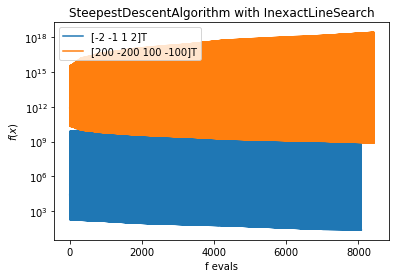

In [ ]:
results_520_SDA = run_exercise520(func=exercise520, opt=SteepestDescentAlgorithm, line_search=InexactLineSearch)

In [ ]:
results_520_SDA[['best_f', 'best_x0','best_x1', 'fevals', 'run_time (s)']]

,best_f,best_x0,best_x1,fevals,run_time (s)
[-2 -1 1 2]T,23.028,0.106294,-0.372972,8081,16.745437
[200 -200 100 -100]T,7.64299e+08,41.863384,-153.133783,8434,16.338221


### item c)

In [ ]:
results_520_BNA = run_exercise520(func=exercise520, opt=BasicNewtonAlgorithm, line_search=InexactLineSearch)

In [ ]:
results_520_BNA[['best_f', 'best_x0','best_x1', 'fevals', 'run_time (s)']]

### item d)

In [ ]:
results_520_GNA = run_exercise520(func=functionObj_multiDim(exercise520_gauss), 
                                  opt=GaussNewtonMethod, line_search=InexactLineSearch)

In [ ]:
results_520_GNA[['best_f', 'best_x0','best_x1', 'fevals', 'run_time (s)']]